# Exploratory Data Analysis
- A method to analyse and summarize the data using pandas library in python.

In [87]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings

In [26]:
# import dataset
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# summary statistics of data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# find null values in the dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
# find percentage of null values in the dataset
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [13]:
# finding unique values in the dataset
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

<AxesSubplot:>

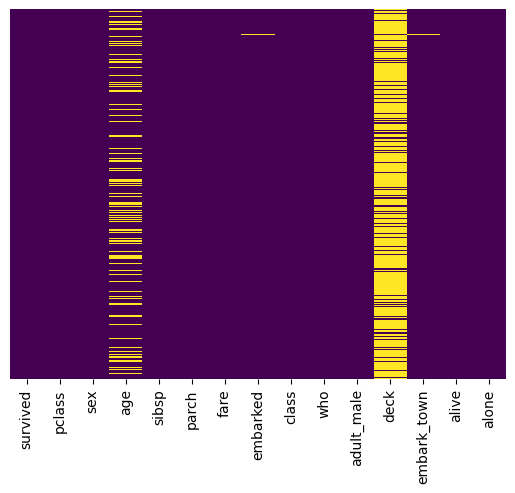

In [20]:
# visualizae the nan value in heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
# drop the unneccesary coloum
df.drop('deck',axis=1,inplace=True)

<AxesSubplot:xlabel='pclass', ylabel='count'>

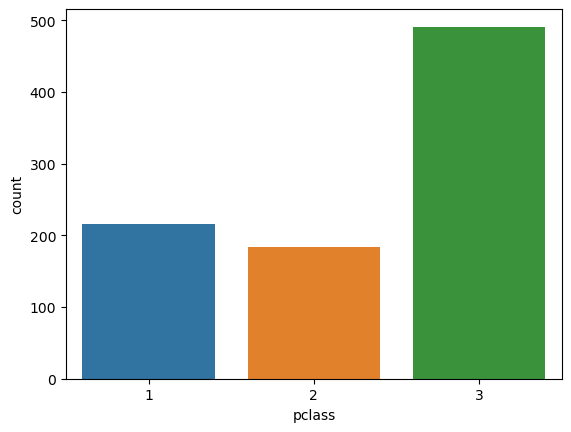

In [33]:
# Visualize and analyze
sns.countplot(data=df,x='pclass')

<AxesSubplot:xlabel='survived', ylabel='age'>

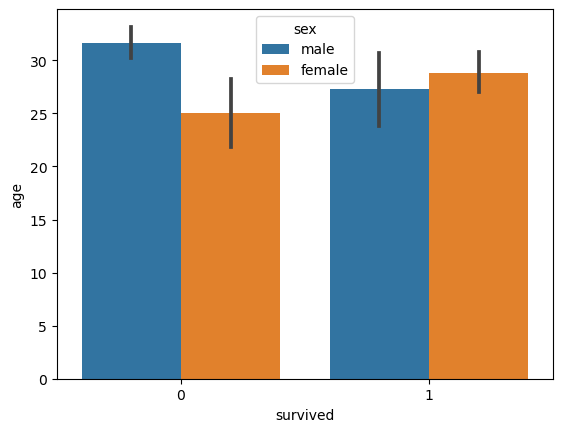

In [75]:
sns.barplot(data=df,x='survived',y='age',hue='sex')

<AxesSubplot:xlabel='survived', ylabel='fare'>

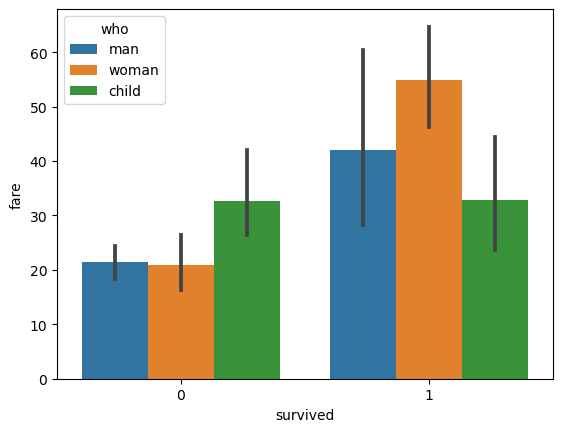

In [76]:
sns.barplot(data=df,x='survived',y='fare',hue='who')

<AxesSubplot:xlabel='pclass', ylabel='count'>

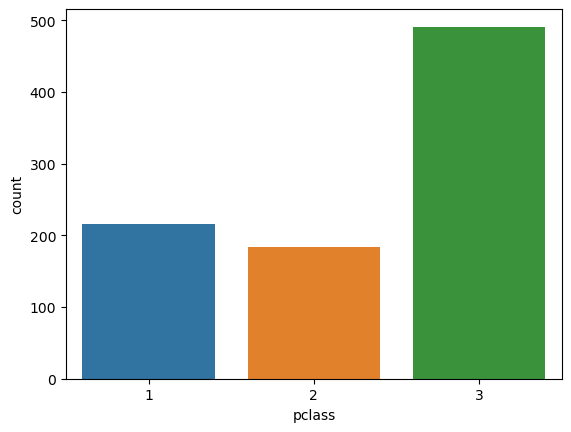

In [77]:
sns.countplot(x='pclass',data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

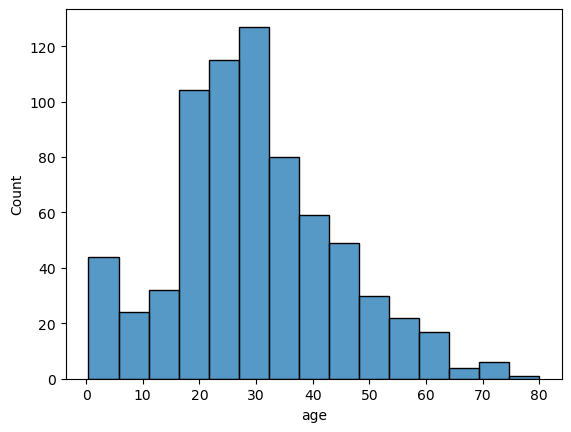

In [45]:
sns.histplot(data=df,x='age',bins=15)

<AxesSubplot:>

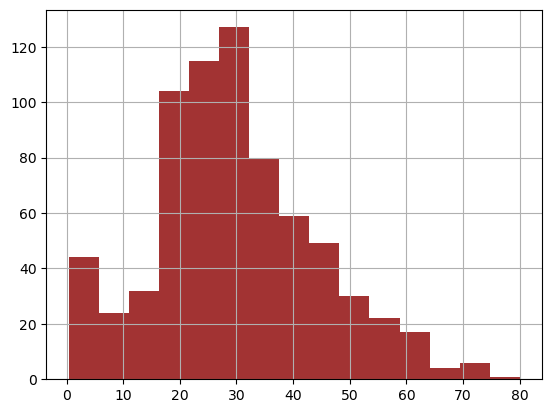

In [52]:
df['age'].hist(bins=15,color='darkred',alpha=0.8)  # opacity = saturation of color ( dark, light)

<AxesSubplot:xlabel='survived', ylabel='age'>

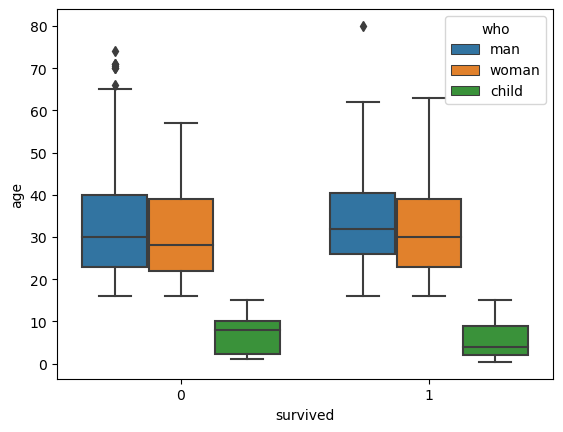

In [78]:
sns.boxplot(data=df,y='age',x='survived',hue='who')  # y axis categorical values and x axis integer coloumn
#03075965865

(0.0, 300.0)

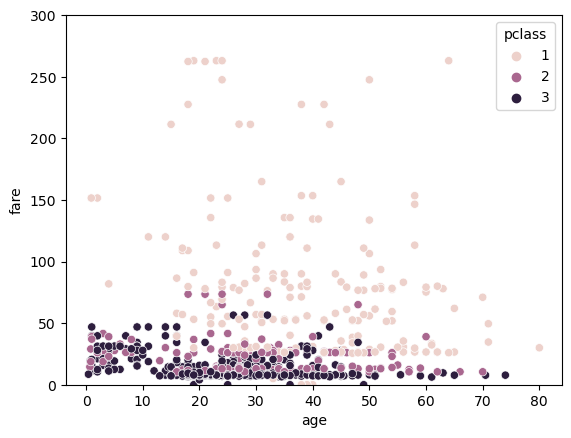

In [79]:
sns.scatterplot(data=df,x='age',y='fare',hue='pclass')
plt.ylim(0,300)

<AxesSubplot:xlabel='pclass'>

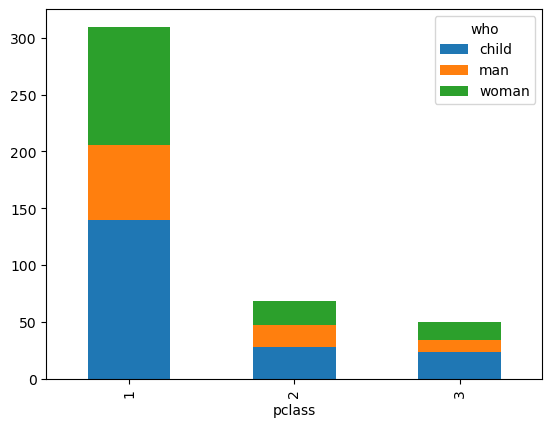

In [85]:
# stack barplot/chart
df.groupby(['pclass','who'])['fare'].mean().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='survived', ylabel='age'>

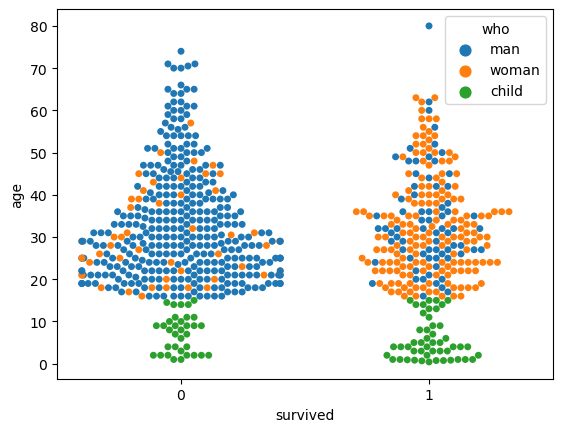

In [90]:
# swarm plots
sns.swarmplot(data=df,x='survived',y='age',hue='who')

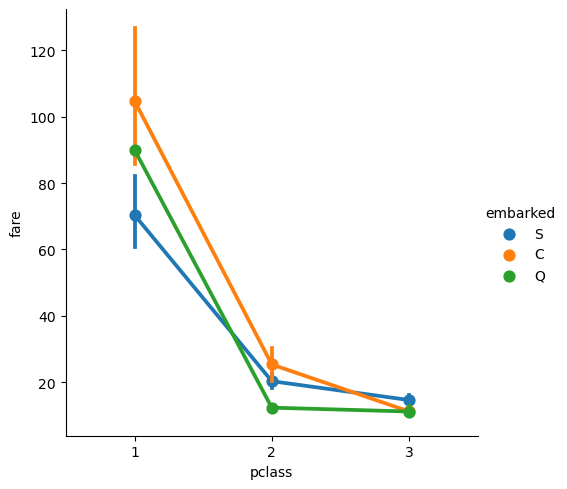

In [92]:
# categorical plot
sns.catplot(x='pclass',y='fare',hue='embarked',kind='point',data=df)

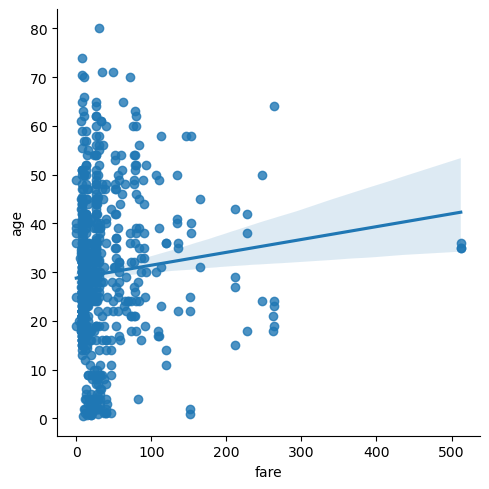

In [94]:
# lm plot (relation between two numeric values)
sns.lmplot(data=df,x='age',y='fare')

In [99]:
# how to add a new coloum and make a new age group
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [100]:
df['age_group']=pd.cut(df['age'],[0,10,18,30,50,80],
labels=['Kids','Child','Adult','Middle Age','Old'])

In [101]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Age
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Age


<AxesSubplot:xlabel='age_group'>

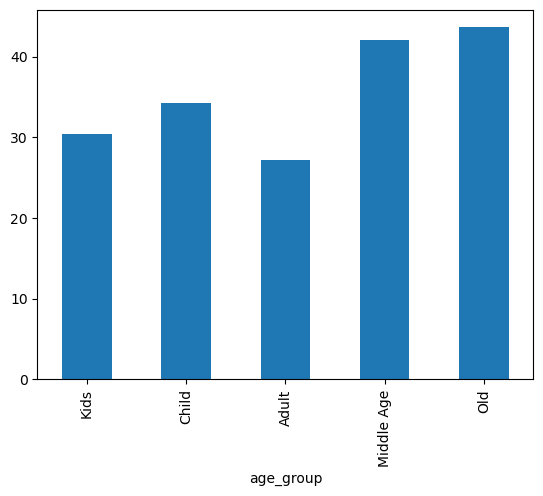

In [102]:
df.groupby('age_group')['fare'].mean().plot(kind='bar')

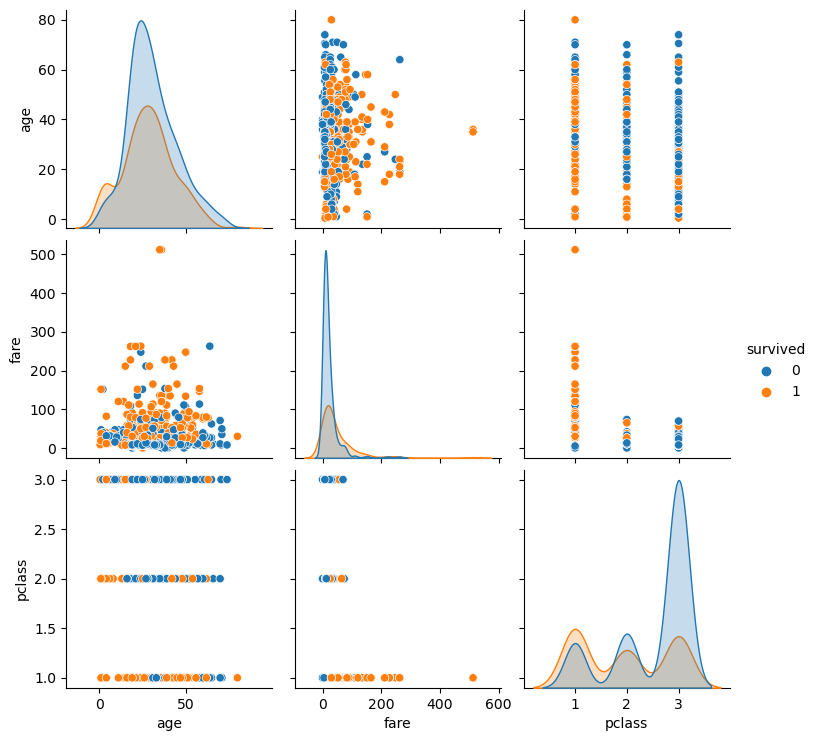

In [104]:
sns.pairplot(df,hue='survived',vars=['age','fare','pclass'])